# Раздел 5. Уравнения с частными производными гиперболического типа.
## Лабораторная рабода №5. Методы решения уравнения переноса. 
### Вариант 3, задание 9.
_Яромир Водзяновский_

## Аналитическое решение 
Дифференциальная задача:
$$ \frac{\partial u}{\partial t} - 4\frac{\partial u}{\partial x} = x; \;\;\; 0 < t \leq 1,\; 0 \leq x \leq 1 $$
$$u(x,0) = \sin{x} - 0.125x^2; \;\; u(1,t) = \sin{(1+4t)} - 0.125$$

Аналитическое решение:
$$u(x,t) = \sin{(4t+x)} - \frac{x^2}{8}$$

In [103]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [104]:
def anal(x,t):
    return np.sin(4*t + x) - x**2 / 8

## Численное решение
Разностная схема:
$$D_h = \left\{ (x_l,t^n): x_l = hl, hL = 1, l = \overline{0,L};\; t^n = n\tau, \tau N=1,n = \overline{0,N} \right \} $$

$$u_l^{n+1} = u_l^n + \frac{2\tau}{3h} \left( 2u_{l+3}^n - 9u_{l+2}^n + 18u_{l+1}^n - 11u_l^n \right) + \frac{8\tau^2}{h^2}  \left( -u_{l+3}^n +4u_{l+2}^n -5u_{l+1}^n +2u_l^n  \right) + \frac{32\tau^3}{3h^3} \left(u_{l+3}^n -3u_{l+2}^n +3u_{l+1}^n -u_l^n  \right) + \tau x_l + 2\tau^2, \;\;\;\;\;\;\;\; l = \overline{0,L-3}, n = \overline{0,N-1}$$

$$u_l^0 = \sin{x_l} - 0.125x_l^2 = \varphi_l^0, \; l = \overline{0,L}; \;\; u_L^n = \sin{(1+4t^n)} -0.125 = \psi_L^n,\;n=\overline{1,N}  $$

$$u_{L-1}^n = ?,\; n = \overline{1,N}; \;\;\; u_{L-2}^n =?,\; n = \overline{1,N}. $$

думаем:

$$[u]_{L-1}^n = [u]_L^n - [u'_x]_L^n h - [u''_{xx}]_L^n \frac{h^2}{2} - [u'''_{xxx}]_L^n \frac{h^3}{6}$$
$$[u]_{L-2}^n = [u]_L^n - [u'_x]_L^n (2h) - [u''_{xx}]_L^n \frac{(2h)^2}{2} - [u'''_{xxx}]_L^n \frac{(2h)^3}{6}$$

In [131]:
L = 10
N = 10
h = 1/L
tau = 1/N
a = -4

In [132]:
x = np.arange(0,1+1/(10*L),1/L)
t = np.arange(0,1+1/(10*N),1/N)

In [107]:
condition = abs(2*h/a)
def check():
    if tau <= condition:
        return 'Устойчиво'
    else:
        return 'Не устойчиво'
check()

'Не устойчиво'

In [166]:
psi = np.sin(1+4*t) - 0.125
psi_der1 = 4*np.cos(1+4*t)
psi_der2 = -16*np.sin(1+4*t)
psi_der3 = -64*np.cos(1+4*t)
b = x
b_der1 = 1
phi = np.sin(x)-0.125*x**2

u_der1 =  -1/a * (-psi_der1 + b)
           
u_der2 = 1/a**2 * (a*b_der1+psi_der2)

u_der3 = -1/a**3 * psi_der3
pd.set_option('display.float_format', lambda x: '{:.5E}'.format(x))

In [167]:
U = np.zeros((N+1,L+1))
U[0] = phi
# U.reshape(1,121)[::11] = psi
U.reshape((1,121))[0][10::11] = psi
U_num = pd.DataFrame(U, columns = x)
U_num

,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
0,0.00000E+00,9.85834E-02,1.93669E-01,2.84270E-01,3.69418E-01,4.48176E-01,5.19642E-01,5.82968E-01,6.37356E-01,6.82077E-01,7.16471E-01
1,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,8.60450E-01
2,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,8.48848E-01
3,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,6.83496E-01
4,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,3.90501E-01
5,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,1.61200E-02
6,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-3.80541E-01
7,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-7.36858E-01
8,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-9.96576E-01
9,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-1.11869E+00


In [168]:
h_arr = [h*i for i in range(0,3)]
for j in range(1,3):
    k = L-j
    for i in range(1,N+1):
        
        U[i][k] = U[i][k-1] - u_der1[i] * h_arr[j] - u_der2[i] * h_arr[j]**2 / 2 - u_der3[i] * h_arr[j]**3 / 6
pd.DataFrame(U, columns = x)

,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
0,0.00000E+00,9.85834E-02,1.93669E-01,2.84270E-01,3.69418E-01,4.48176E-01,5.19642E-01,5.82968E-01,6.37356E-01,6.82077E-01,7.16471E-01
1,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,5.39290E-02,2.07023E-02,8.60450E-01
2,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-3.12664E-02,-2.16388E-02,8.48848E-01
3,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-1.12315E-01,-6.11557E-02,6.83496E-01
4,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-1.77210E-01,-9.20042E-02,3.90501E-01
5,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-2.16496E-01,-1.09709E-01,1.61200E-02
6,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-2.24760E-01,-1.11869E-01,-3.80541E-01
7,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-2.01485E-01,-9.85379E-02,-7.36858E-01
8,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-1.51137E-01,-7.22157E-02,-9.96576E-01
9,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,0.00000E+00,-8.24539E-02,-3.74524E-02,-1.11869E+00


In [169]:
h_arr

[0.0, 0.1, 0.2]

In [170]:
for n in range(N):
    for l in range(L-2):
        U[n+1][l] = U[n][l] + (2*tau/(3*h)*(2*U[n][l+3] - 9*U[n][l+2] + 18*U[n][l+1] - 11*U[n][l]) + 
                           8*(tau**2)/(h**2)*(-U[n][l+3] +4*U[n][l+2] -5*U[n][l+1] +2*U[n][l]) + 
                           32*(tau**3)/(3*h**3)*(U[n][l+3] - 3*U[n][l+2] + 3*U[n][l+1] - U[n][l]) + 
                           tau*x[l] + 2*tau**2)
ans = pd.DataFrame(U, columns = x)
ans

,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
0,0.00000E+00,9.85834E-02,1.93669E-01,2.84270E-01,3.69418E-01,4.48176E-01,5.19642E-01,5.82968E-01,6.37356E-01,6.82077E-01,7.16471E-01
1,3.89399E-01,4.78146E-01,5.59604E-01,6.32920E-01,6.97300E-01,7.52013E-01,7.96399E-01,8.29879E-01,5.39290E-02,2.07023E-02,8.60450E-01
2,7.17243E-01,7.81948E-01,8.36328E-01,8.79801E-01,9.11871E-01,-2.25997E+00,2.36235E+00,2.79342E+00,-3.12664E-02,-2.16388E-02,8.48848E-01
3,9.31787E-01,9.62041E-01,-1.17882E+01,2.58269E+01,-1.28922E+01,-5.10622E+00,8.99238E+00,6.96736E-01,-1.12315E-01,-6.11557E-02,6.83496E-01
4,1.76974E+02,-2.54615E+02,1.72064E+02,-1.07389E+01,-5.86400E+01,3.65161E+01,-5.69617E+00,2.04492E+00,-1.77210E-01,-9.20042E-02,3.90501E-01
5,-2.27076E+03,7.72776E+02,2.82925E+02,-4.65652E+02,2.47121E+02,-7.22091E+01,1.46511E+01,-5.49735E-01,-2.16496E-01,-1.09709E-01,1.61200E-02
6,1.80172E+03,4.14135E+03,-3.91706E+03,1.94605E+03,-6.26003E+02,1.33316E+02,-1.59099E+01,4.96482E-01,-2.24760E-01,-1.11869E-01,-3.80541E-01
7,4.60502E+04,-3.39898E+04,1.59906E+04,-5.31354E+03,1.25677E+03,-2.00764E+02,1.88769E+01,-2.15647E+00,-2.01485E-01,-9.85379E-02,-7.36858E-01
8,-2.99207E+05,1.34860E+05,-4.55884E+04,1.16208E+04,-2.18165E+03,2.88474E+02,-2.66081E+01,-9.15673E-01,-1.51137E-01,-7.22157E-02,-9.96576E-01
9,1.15866E+06,-3.95665E+05,1.06315E+05,-2.21846E+04,3.49160E+03,-3.89947E+02,2.36433E+01,-3.15189E+00,-8.24539E-02,-3.74524E-02,-1.11869E+00


In [171]:
U_anal

,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
0,0.00000E+00,9.85834E-02,1.93669E-01,2.84270E-01,3.69418E-01,4.48176E-01,5.19642E-01,5.82968E-01,6.37356E-01,6.82077E-01,7.16471E-01
1,3.89418E-01,4.78176E-01,5.59642E-01,6.32968E-01,6.97356E-01,7.52077E-01,7.96471E-01,8.29957E-01,8.52039E-01,8.62308E-01,8.60450E-01
2,7.17356E-01,7.82077E-01,8.36471E-01,8.79957E-01,9.12039E-01,9.32308E-01,9.40450E-01,9.36245E-01,9.19574E-01,8.90415E-01,8.48848E-01
3,9.32039E-01,9.62308E-01,9.80450E-01,9.86245E-01,9.79574E-01,9.60415E-01,9.28848E-01,8.85050E-01,8.29297E-01,7.61959E-01,6.83496E-01
4,9.99574E-01,9.90415E-01,9.68848E-01,9.35050E-01,8.89297E-01,8.31959E-01,7.63496E-01,6.84455E-01,5.95463E-01,4.97222E-01,3.90501E-01
5,9.09297E-01,8.61959E-01,8.03496E-01,7.34455E-01,6.55463E-01,5.67222E-01,4.70501E-01,3.66130E-01,2.54988E-01,1.37999E-01,1.61200E-02
6,6.75463E-01,5.97222E-01,5.10501E-01,4.16130E-01,3.14988E-01,2.07999E-01,9.61200E-02,-1.96693E-02,-1.38374E-01,-2.58996E-01,-3.80541E-01
7,3.34988E-01,2.37999E-01,1.36120E-01,3.03307E-02,-7.83741E-02,-1.88996E-01,-3.00541E-01,-4.12033E-01,-5.22520E-01,-6.31086E-01,-7.36858E-01
8,-5.83741E-02,-1.58996E-01,-2.60541E-01,-3.62033E-01,-4.62520E-01,-5.61086E-01,-6.56858E-01,-7.49016E-01,-8.36802E-01,-9.19527E-01,-9.96576E-01
9,-4.42520E-01,-5.31086E-01,-6.16858E-01,-6.99016E-01,-7.76802E-01,-8.49527E-01,-9.16576E-01,-9.77416E-01,-1.03160E+00,-1.07878E+00,-1.11869E+00


In [172]:
t_a = []
for i in range(N+1):
    for j in range(N+1):
        t_a.append(t[i])
t_a = np.array(t_a)

x_a = np.array([])
for i in range(N+1):
    x_a = np.concatenate((x_a,x))
U_an = np.vectorize(anal)(x_a,t_a).reshape((N+1,N+1))   
U_anal = pd.DataFrame(np.vectorize(anal)(x_a,t_a).reshape((N+1,N+1)), columns = x)
U_anal

,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
0,0.00000E+00,9.85834E-02,1.93669E-01,2.84270E-01,3.69418E-01,4.48176E-01,5.19642E-01,5.82968E-01,6.37356E-01,6.82077E-01,7.16471E-01
1,3.89418E-01,4.78176E-01,5.59642E-01,6.32968E-01,6.97356E-01,7.52077E-01,7.96471E-01,8.29957E-01,8.52039E-01,8.62308E-01,8.60450E-01
2,7.17356E-01,7.82077E-01,8.36471E-01,8.79957E-01,9.12039E-01,9.32308E-01,9.40450E-01,9.36245E-01,9.19574E-01,8.90415E-01,8.48848E-01
3,9.32039E-01,9.62308E-01,9.80450E-01,9.86245E-01,9.79574E-01,9.60415E-01,9.28848E-01,8.85050E-01,8.29297E-01,7.61959E-01,6.83496E-01
4,9.99574E-01,9.90415E-01,9.68848E-01,9.35050E-01,8.89297E-01,8.31959E-01,7.63496E-01,6.84455E-01,5.95463E-01,4.97222E-01,3.90501E-01
5,9.09297E-01,8.61959E-01,8.03496E-01,7.34455E-01,6.55463E-01,5.67222E-01,4.70501E-01,3.66130E-01,2.54988E-01,1.37999E-01,1.61200E-02
6,6.75463E-01,5.97222E-01,5.10501E-01,4.16130E-01,3.14988E-01,2.07999E-01,9.61200E-02,-1.96693E-02,-1.38374E-01,-2.58996E-01,-3.80541E-01
7,3.34988E-01,2.37999E-01,1.36120E-01,3.03307E-02,-7.83741E-02,-1.88996E-01,-3.00541E-01,-4.12033E-01,-5.22520E-01,-6.31086E-01,-7.36858E-01
8,-5.83741E-02,-1.58996E-01,-2.60541E-01,-3.62033E-01,-4.62520E-01,-5.61086E-01,-6.56858E-01,-7.49016E-01,-8.36802E-01,-9.19527E-01,-9.96576E-01
9,-4.42520E-01,-5.31086E-01,-6.16858E-01,-6.99016E-01,-7.76802E-01,-8.49527E-01,-9.16576E-01,-9.77416E-01,-1.03160E+00,-1.07878E+00,-1.11869E+00


In [21]:
from scipy.spatial.distance import cosine

cosine(np.vectorize(anal)(x_a,t_a), U.reshape((1,121)))

0.9455138604735126

In [173]:
data = np.concatenate((x,U_an[10],U[10], abs(U_an[10]-U[10]), [max(abs(U_an[10]-U[10])) for i in range(N+1)]))
data = data.reshape((5,11))
table = pd.DataFrame(data.T, columns = ['x', 'Analitic', 'Numeric', 'Diff', 'Max Diff'])
table

,x,Analitic,Numeric,Diff,Max Diff
0,0.00000E+00,-7.56802E-01,-3.46795E+06,3.46795E+06,3.46795E+06
1,1.00000E-01,-8.19527E-01,9.68001E+05,9.68001E+05,3.46795E+06
2,2.00000E-01,-8.76576E-01,-2.17563E+05,2.17562E+05,3.46795E+06
3,3.00000E-01,-9.27416E-01,3.85853E+04,3.85862E+04,3.46795E+06
4,4.00000E-01,-9.71602E-01,-5.20579E+03,5.20482E+03,3.46795E+06
5,5.00000E-01,-1.00878E+00,5.03172E+02,5.04180E+02,3.46795E+06
6,6.00000E-01,-1.03869E+00,-3.58260E+01,3.47873E+01,3.46795E+06
7,7.00000E-01,-1.06117E+00,-1.33798E+00,2.76806E-01,3.46795E+06
8,8.00000E-01,-1.07616E+00,-7.06783E-03,1.06910E+00,3.46795E+06
9,9.00000E-01,-1.08370E+00,-1.31126E-04,1.08357E+00,3.46795E+06


<ipython-input-79-6fb5a74f4a17>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('surface.png', dpi=400, quality=100)


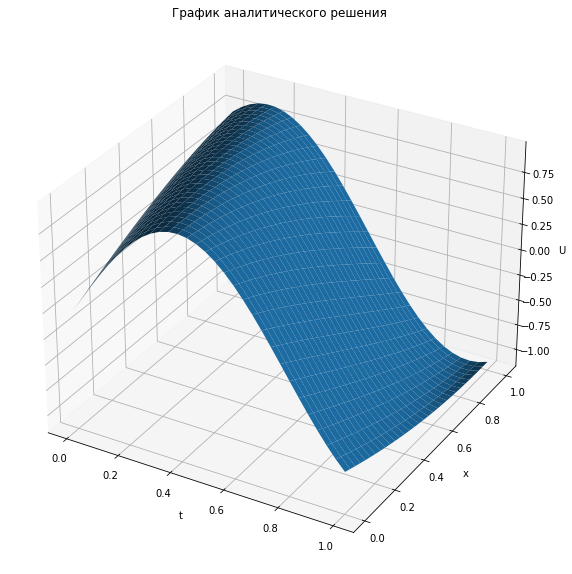

In [79]:
L = 30
N = L

x = np.arange(0,1+1/(10*L),1/L)
t = np.arange(0,1+1/(10*N),1/N)

t_a = []
for i in range(N+1):
    for j in range(N+1):
        t_a.append(t[i])
t_a = np.array(t_a)

x_a = np.array([])
for i in range(N+1):
    x_a = np.concatenate((x_a,x))
    
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
xgrid, tgrid = np.meshgrid(x, t)
ax.plot_surface(tgrid, xgrid, anal(xgrid,tgrid))
ax.set_zlabel('U')
ax.set_ylabel('x')
ax.set_xlabel('t')
ax.set_title('График аналитического решения')
plt.savefig('surface.png', dpi=400, quality=100)